# **Milestone 2, Phase 1**

`Julio Muhammad Rizki, FTDS Batch 003-HCK`

# Objectives

Notebook ini bertujuan untuk menganalisa case tentang Oil Pipeline Accidents berdasarkan data sejak tahun 2010 sampai 2017 awal. Dataset ini disediakan oleh DOT's (Department of Transportation) Pipeline and Hazardous Materials Safety Administration.

Berdasarkan analisa yang akan dilakukan, peneliti akan membuat model machine learning untuk melakukan prediksi terhadap penyebab dari accident menggunakan metode classification. Pemilihan model akan dilakukan dengan meng-evaluasi beberapa model berbeda dan memilih model terbaik untuk digunakan dalam machine learning.

# Library Import

In [641]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:,.2f}'.format

import joblib

# Data Loading

About this dataset :

This database includes a record for each oil pipeline leak or spill reported to the Pipeline and Hazardous Materials Safety Administration since 2010. These records include the incident date and time, operator and pipeline, cause of incident, type of hazardous liquid and quantity lost, injuries and fatalities, and associated costs.

The oil pipeline accident reports were collected and published by the DOT's Pipeline and Hazardous Materials Safety Administration.

Data taken from kaggle : https://bit.ly/3DhgrSa

In [642]:
df = pd.read_csv('h8dsft_Milestone2P1_Julio_Muhammad_Rizki.csv')

In [643]:
df.head(10).append(df.tail(10))

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67,-97.78,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.10,0.00,21.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.00,"1,517.00",0.00,0.00,0.00,0.00,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94,-70.49,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.00,0.12,0.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00",8.00,0.00,0.00,0.00,0.00,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18,-93.35,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.00,0.00,2.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,200.00,0.00,0.00,0.00,0.00,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.69,-92.06,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.00,0.48,0.00,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.00,40.00,0.00,"11,300.00",0.00,0.00,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58,-96.65,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,000.00",150.00,0.00,"7,500.00","2,000.00",0.00,29650
5,20100021,17161,2010,1/8/2010 11:38 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",NaN,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,NECHE,PEMBINA,ND,49.00,-97.53,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,"3,784.00",0.00,"1,547.00","2,237.00",NO,NO,YES,1/8/2010 23:41,1/13/2010 9:17,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"76,940.00","167,775.00","150,000.00","1,800,000.00","2,000,000.00",0.00,4194715
6,20110036,18052,2010,1/9/2010 12:15 AM,26041,"KINDER MORGAN LIQUID TERMINALS, LLC",NaN,ONSHORE,TANK,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",GASOLINE (NON-ETHANOL),NaN,GALENA PARK,HARRIS,TX,29.43,-95.12,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,35.00,0.00,30.00,5.00,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,400.00,0.00,0.00,"70,000.00",0.00,70400
7,20100255,18584,2010,1/9/2010 1:12 AM,12624,MOBIL CORP,HULL STATION,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,HULL,LIBERTY,TX,30.09,-94.38,NATURAL FORCE DAMAGE,TEMPERATURE,0.24,0.00,0.00,0.24,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.00,13.00,0.00,0.00,0.00,0.00,4

In [644]:
df.shape

(2795, 48)

In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

**Pengecekan Missing Value**

<AxesSubplot:>

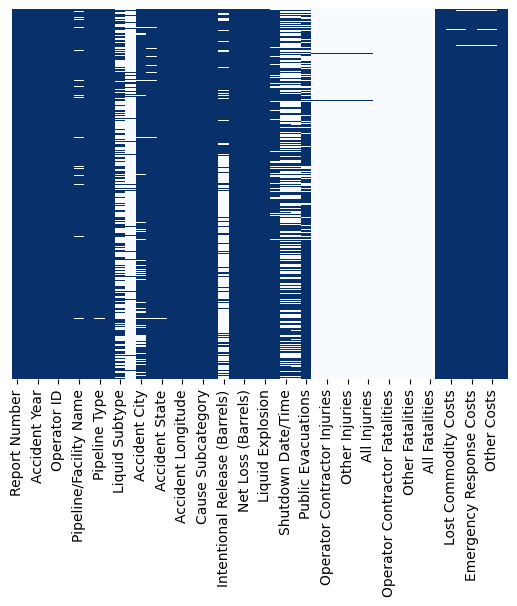

In [646]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues_r')

Beberapa kolum yang tidak dibutuhkan akan di drop terlebih dahulu.

In [647]:
df2= df.drop(['Operator Contractor Injuries',
                  'Other Injuries','All Injuries',
                  'Emergency Responder Injuries',
                  'Operator Contractor Fatalities',
                  'Public Injuries',
                  'Emergency Responder Fatalities',
                  'Public Fatalities',
                  'Report Number',
                  'Operator ID',
                   'Operator Employee Fatalities',
                   'Other Fatalities','All Fatalities',
                   'Operator Employee Injuries'],axis=1)

Untuk mempertahankan kolum yang ada, Missing Value selanjutnya akan diisi dengan nilai '0' dan dilakukan pengecekan kembali pada missing value.

In [648]:
df_clean = df2.fillna(0.00)

<AxesSubplot:>

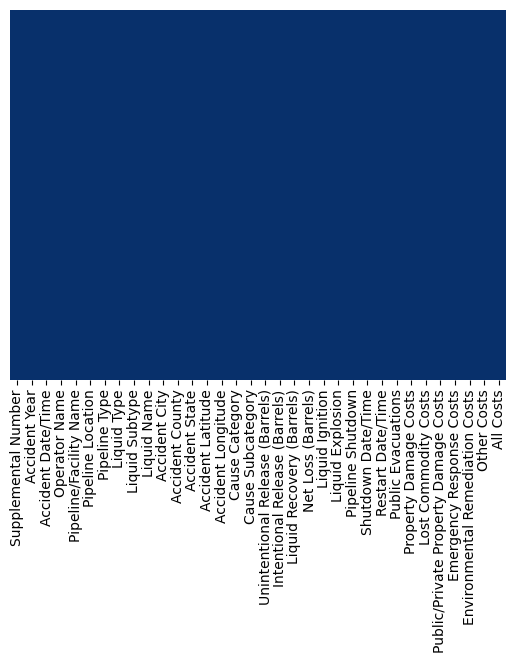

In [649]:
sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='Blues_r')

In [650]:
df_clean.head()

,Supplemental Number,Accident Year,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,17305,2010,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,0.00,MCPHERSON,MCPHERSON,KS,38.67,-97.78,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.10,0.00,21.00,NO,NO,NO,0.00,0.00,0.00,110.00,"1,517.00",0.00,0.00,0.00,0.00,1627
1,17331,2010,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,0.00,0.00,RAYMOND,CUMBERLAND,ME,43.94,-70.49,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.00,0.12,0.00,NO,NO,0.00,0.00,0.00,0.00,"4,000.00",8.00,0.00,0.00,0.00,0.00,4008
2,17747,2010,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",0.00,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18,-93.35,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.00,0.00,2.00,NO,NO,0.00,0.00,0.00,0.00,0.00,200.00,0.00,0.00,0.00,0.00,200
3,18574,2010,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,0.00,0.00,SUPERIOR,DOUGLAS,WI,46.69,-92.06,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.00,0.48,0.00,NO,NO,0.00,0.00,0.00,0.00,200.00,40.00,0.00,"11,300.00",0.00,0.00,11540
4,16276,2010,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,0.00,0.00,SHERMAN,GRAYSON,TX,33.58,-96.65,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,0.00,698.00,2.00,NO,NO,NO,0.00,0.00,0.00,"20,000.00",150.00,0.00,"7,500.00","2,000.00",0.00,29650


# Exploratory Data Analysis

Berikut adalah Operator dengan kasus accident/kecelakaan terbanyak.

In [651]:
df_clean['Operator Name'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          195
SUNOCO PIPELINE L.P.                   180
PLAINS PIPELINE, L.P.                  156
ENTERPRISE PRODUCTS OPERATING LLC      155
MAGELLAN PIPELINE COMPANY, LP          140
COLONIAL PIPELINE CO                   136
BUCKEYE PARTNERS, LP                   115
MARATHON PIPE LINE LLC                  87
KINDER MORGAN LIQUID TERMINALS, LLC     87
PHILLIPS 66 PIPELINE LLC                80
Name: Operator Name, dtype: int64

Rentang tahun dari data terjadi dari 2010 sampai 2017.

In [652]:
df_clean['Accident Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

Accident terbanyak terjadi berdasarkan Tipe Pipeline seperti dibawah ini.

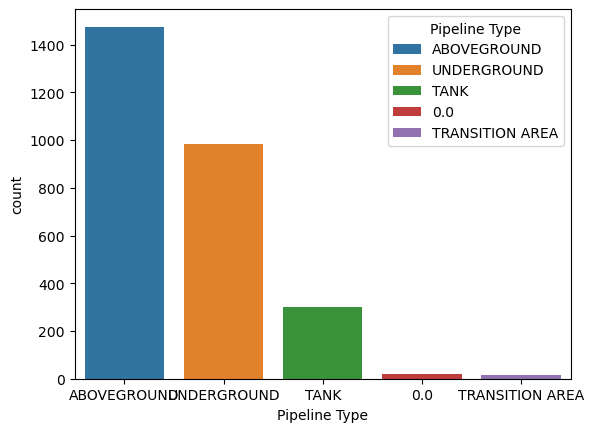

In [653]:
sns.countplot(x='Pipeline Type',data=df_clean,hue='Pipeline Type', dodge=False,order = df_clean['Pipeline Type'].value_counts().index)
plt.show()

Berdasarkan lokasi, berikut lokasi terbanyak terjadinya accident.

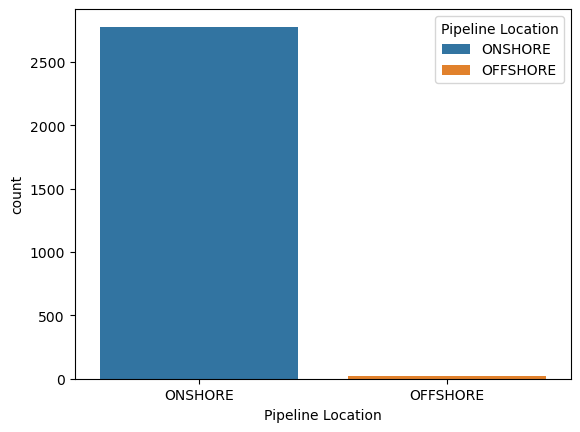

In [654]:
sns.countplot(x='Pipeline Location',data=df_clean,hue='Pipeline Location', dodge=False,order=df_clean['Pipeline Location'].value_counts().index)
plt.show()

Berikut adalah penyebab kerusakan terbanyak pada kecelakaan / pipeline spill.

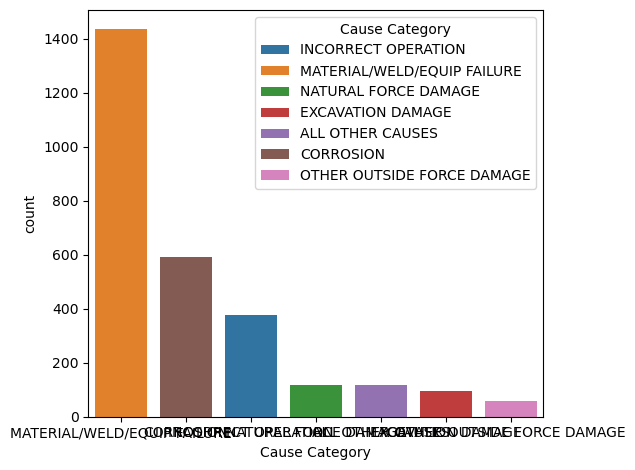

In [722]:
sns.countplot(x='Cause Category',data=df_clean,hue='Cause Category', dodge=False,order = df_clean['Cause Category'].value_counts().index)
plt.tight_layout()

Berikutnya akan dilihat pada tahun berapa accident paling banyak terjadi. Namun sebelumnya kolum 'Accident Date' akan dirubah menjadi tipe DateTime terlebih dahulu.

In [655]:
df_clean['Accident Date/Time'] = pd.to_datetime(df_clean['Accident Date/Time'])

In [656]:
df_clean['Hour'] =  df_clean['Accident Date/Time'].apply(lambda time: time.hour)
df_clean['Month'] =  df_clean['Accident Date/Time'].apply(lambda time: time.month)
df_clean['Day of Week'] =  df_clean['Accident Date/Time'].apply(lambda time: time.dayofweek)

In [657]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [658]:
df_clean['Day of Week'] = df_clean['Day of Week'].map(day)

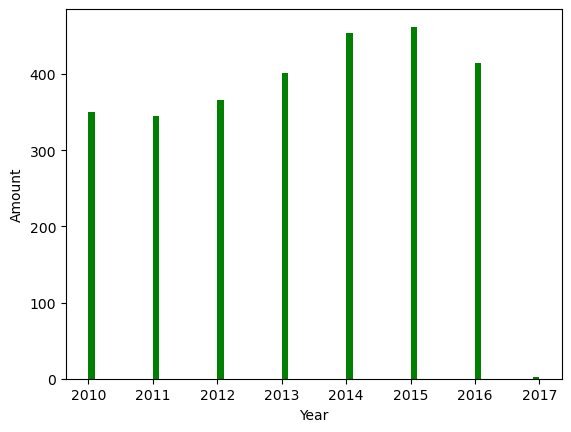

In [659]:
df_clean['Accident Year'].plot(kind='hist', bins=70, color='green')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [660]:
yearly = df_clean.groupby('Accident Year').count()
yearly

,Supplemental Number,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Hour,Month,Day of Week
Accident Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
2011,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345,345
2012,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366
2013,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401,401
2014,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454,454
2015,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462,462
2016,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415
2017,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Ditemukan bahwa accident paling banyak terjadi di tahun 2015. Mengecualikan tahun 2017 yang hanya memiliki 2 entry data (kemungkinan karena memang pengambilan data berhenti pada saat itu, bukan berarti sepanjang tahun hanya terdapat 2 kali accident) sejak tahun 2010 sampai 2015 selalu terjadi kenaikan jumlah accident setiap tahunnya, namun pada 2016 terjadi penurunan dibandingkan tahun sebelumnya.

<AxesSubplot:xlabel='Accident Year'>

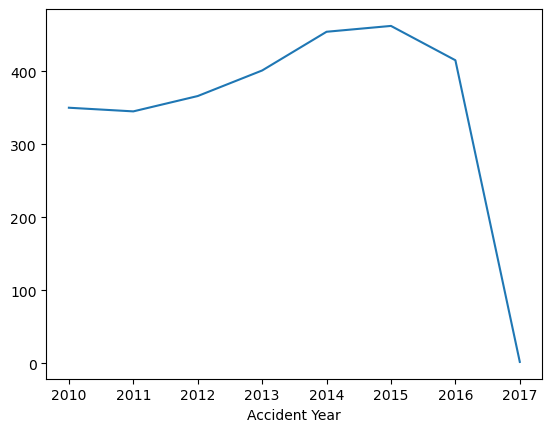

In [661]:
yearly['Accident Date/Time'].plot()

Berikut timeline dari banyaknya terjadi accident pada aboveground dan underground.

In [662]:
df_clean['Date']=df_clean['Accident Date/Time'].apply(lambda t: t.date())

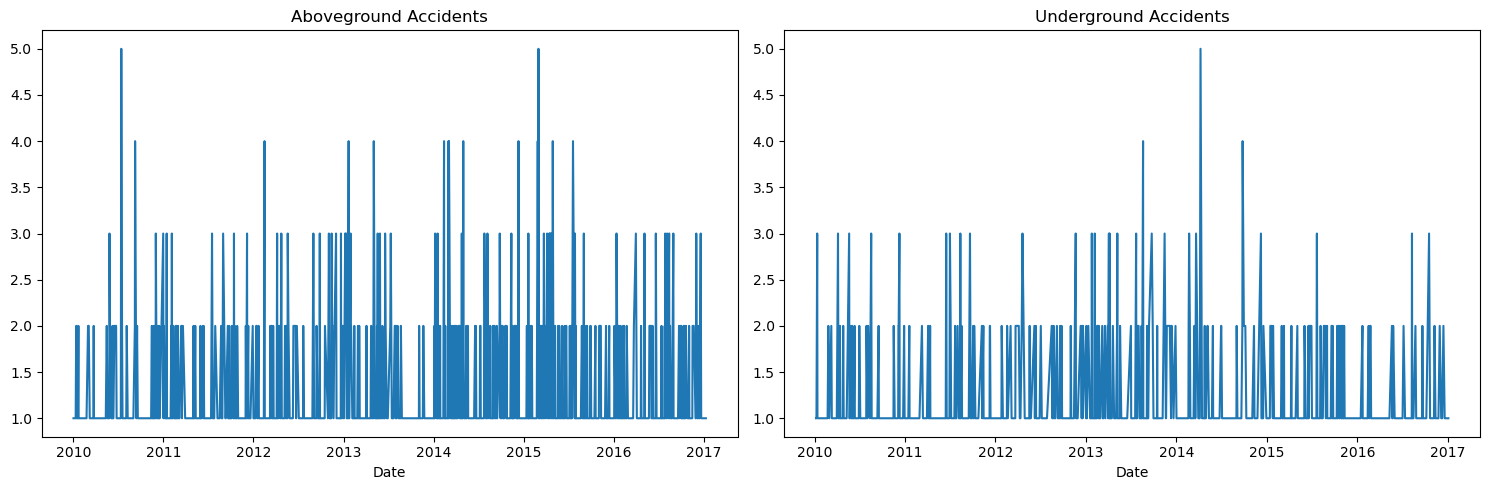

In [663]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Aboveground accidents
aboveground_df = df_clean[df_clean['Pipeline Type']=='ABOVEGROUND']
date_counts = aboveground_df.groupby('Date').count()['Accident Date/Time']
sns.lineplot(date_counts.index, date_counts.values, ax=ax[0])
ax[0].set_title('Aboveground Accidents')

# Underground accidents
underground_df = df_clean[df_clean['Pipeline Type']=='UNDERGROUND']
date_counts2 = underground_df.groupby('Date').count()['Accident Date/Time']
sns.lineplot(date_counts2.index, date_counts2.values, ax=ax[1])
ax[1].set_title('Underground Accidents')

plt.tight_layout()
plt.show()

Berikut adalah pencarian beberapa korelasi antar kolum yang ada

<AxesSubplot:>

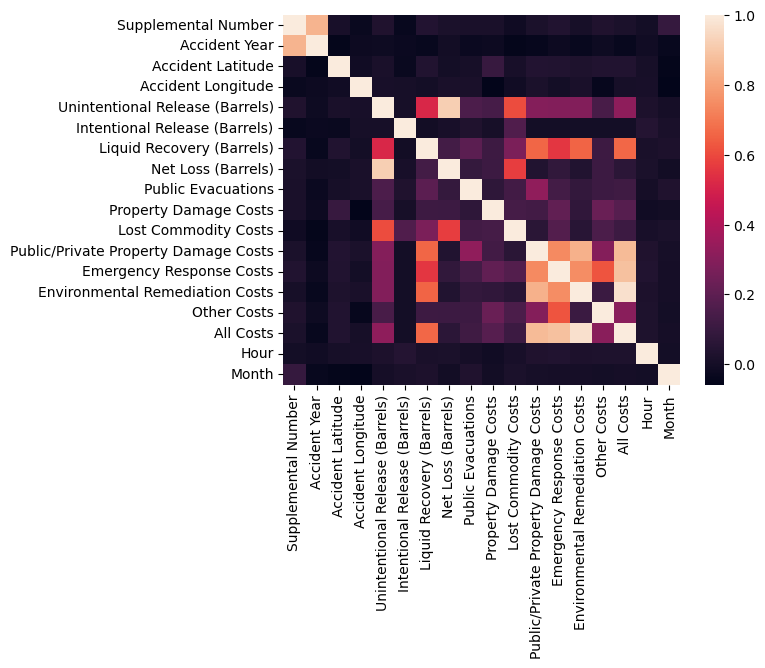

In [664]:
sns.heatmap(df_clean.corr())

In [665]:
other_col = df[['All Costs',
     'Other Costs', 'Environmental Remediation Costs',
     'Emergency Response Costs', 'Public/Private Property Damage Costs',
     'Net Loss (Barrels)', 'Intentional Release (Barrels)',
     'Unintentional Release (Barrels)','Accident Latitude',
             'Accident Longitude','Liquid Recovery (Barrels)',
             'Public Evacuations'
            ]]

Diatas adalah korelasi antar kolum, namun hanya yang numerical. Dibawah akan kita lihat bagaimana korelasi antar beberapa kolum terhadap kolum yang akan kita gunakan sebagai target, yaitu 'Cause Category'. Sebelumnya kolum 'Cause Category' akan di encode sementara untuk dapat ditemukan korelasinya.

In [666]:
df_clean['All Costs'] = df_clean['All Costs'].astype(float)

In [667]:
le = LabelEncoder()
df_clean['Cause Category'] = le.fit_transform(df_clean['Cause Category'])

In [668]:
corr = other_col.apply(lambda x: x.corr(df_clean['Cause Category'])).sort_values(ascending=False)
print(corr)

Accident Latitude                      0.12
Accident Longitude                     0.08
Intentional Release (Barrels)          0.04
Public/Private Property Damage Costs   0.03
Net Loss (Barrels)                     0.03
Unintentional Release (Barrels)        0.02
Public Evacuations                     0.02
Environmental Remediation Costs        0.01
All Costs                              0.01
Emergency Response Costs               0.01
Other Costs                            0.01
Liquid Recovery (Barrels)              0.00
dtype: float64


Selanjutnya peneliti akan menggunakan kolum-kolum dengan korelasi diatas 0.01 sebagai feature nantinya.

In [669]:
df_clean['Cause Category'] = le.inverse_transform(df_clean['Cause Category'])

In [670]:
df_clean.drop(columns=['Accident Date/Time', 'Hour', 'Month', 'Day of Week', 'Date'], inplace=True)

# Data Preprocessing

Untuk memudahkan dalam proses pembelajaran model, data akan di split berdasarkan target dan feature serta di pre-process sesuai kebutuhan. Pada case ini, feature yang akan digunakan perlu dilakukan scaling namun tidak diperlukan encoding (karena semuanya numerical).

In [671]:
y = df_clean['Cause Category']
X = df_clean[['All Costs',
     'Environmental Remediation Costs',
     'Public/Private Property Damage Costs',
     'Net Loss (Barrels)', 'Intentional Release (Barrels)',
     'Unintentional Release (Barrels)','Accident Latitude',
             'Accident Longitude',
             'Public Evacuations'
            ]]

In [672]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2236, 9)
Test Size  :  (559, 9)


In [673]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Model Definition

Selanjutnya akan dilakukan percobaan dengan beberapa model untuk memilih 4 model terbaik yang nantinya akan digunakan untuk melakukan prediksi.

In [674]:
models = [LogisticRegression(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), GaussianNB(), AdaBoostClassifier(), XGBClassifier()]

In [675]:
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=3, random_state = 14, shuffle= True))
    print(f"{model.__class__.__name__} : {scores.mean():.2f}")

LogisticRegression : 0.30
SVC : 0.51
DecisionTreeClassifier : 0.40
RandomForestClassifier : 0.53
KNeighborsClassifier : 0.41
GaussianNB : 0.13
AdaBoostClassifier : 0.50
XGBClassifier : nan


Berdasarkan hasil pencarian diatas, model terbaik yang akan digunakan dalam case ini adalah Support Vector Classifier, Random Forest, K-Neighbor, dan Adaboost. Model-model tersebut kemudian akan dibuatkan Pipeline.

In [676]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, X_train.columns),
        ])

# Make a model with pipeline for baseline parameter
svc = Pipeline(steps=[('preprocessor', preprocessor), ('svc', SVC(random_state=14))])
rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier(random_state=14))])
knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])
adb = Pipeline(steps=[('preprocessor', preprocessor), ('adb', AdaBoostClassifier(random_state=14))])

# Model Training

Model-model yang telah dibuat kemudian dilakukan training terhadap data agar nantinya dapat digunakan untuk melakukan prediksi terhadap data yang baru. Model juga dilakukan test untuk mengecek seberapa baik model melakukan prediksi.

In [677]:
svc.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  Index(['All Costs', 'Environmental Remediation Costs',
       'Public/Private Property Damage Costs', 'Net Loss (Barrels)',
       'Intentional Release (Barrels)', 'Unintentional Release (Barrels)',
       'Accident Latitude', 'Accident Longitude', 'Public Evacuations'],
      dtype='object'))])),
                ('svc', SVC(random_state=14))])

In [678]:
rf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  Index(['All Costs', 'Environmental Remediation Costs',
       'Public/Private Property Damage Costs', 'Net Loss (Barrels)',
       'Intentional Release (Barrels)', 'Unintentional Release (Barrels)',
       'Accident Latitude', 'Accident Longitude', 'Public Evacuations'],
      dtype='object'))])),
                ('rf', RandomForestClassifier(random_state=14))])

In [679]:
knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  Index(['All Costs', 'Environmental Remediation Costs',
       'Public/Private Property Damage Costs', 'Net Loss (Barrels)',
       'Intentional Release (Barrels)', 'Unintentional Release (Barrels)',
       'Accident Latitude', 'Accident Longitude', 'Public Evacuations'],
      dtype='object'))])),
                ('knn', KNeighborsClassifier())])

In [680]:
adb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  Index(['All Costs', 'Environmental Remediation Costs',
       'Public/Private Property Damage Costs', 'Net Loss (Barrels)',
       'Intentional Release (Barrels)', 'Unintentional Release (Barrels)',
       'Accident Latitude', 'Accident Longitude', 'Public Evacuations'],
      dtype='object'))])),
                ('adb', AdaBoostClassifier(random_state=14))])

In [681]:
svc_pred = svc.predict(X_test)

In [682]:
rf_pred = rf.predict(X_test)

In [683]:
knn_pred = knn.predict(X_test)

In [684]:
adb_pred = adb.predict(X_test)

# Model Evaluation

Berikut adalah evaluasi dari model yang telah dilakukan training dan test.

In [685]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[  0   0   0   0  24   0   0]
 [  0   0   0   0 118   0   0]
 [  0   0   0   0  19   0   0]
 [  0   0   0   0  76   0   0]
 [  0   0   0   0 287   0   0]
 [  0   0   0   0  24   0   0]
 [  0   0   0   0  11   0   0]]


                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORROSION       0.00      0.00      0.00       118
          EXCAVATION DAMAGE       0.00      0.00      0.00        19
        INCORRECT OPERATION       0.00      0.00      0.00        76
MATERIAL/WELD/EQUIP FAILURE       0.51      1.00      0.68       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.51       559
                  macro avg       0.07      0.14      0.10       559
               weighted avg       0.26      0.51      0.35       559



In [686]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[  1   7   0   0  16   0   0]
 [  2  47   1   1  65   1   1]
 [  0   4   2   0  13   0   0]
 [  0  13   1  10  51   1   0]
 [  1  37   2   7 240   0   0]
 [  0   2   1   1  18   2   0]
 [  0   1   1   1   8   0   0]]


                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.25      0.04      0.07        24
                  CORROSION       0.42      0.40      0.41       118
          EXCAVATION DAMAGE       0.25      0.11      0.15        19
        INCORRECT OPERATION       0.50      0.13      0.21        76
MATERIAL/WELD/EQUIP FAILURE       0.58      0.84      0.69       287
       NATURAL FORCE DAMAGE       0.50      0.08      0.14        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.54       559
                  macro avg       0.36      0.23      0.24       559
               weighted avg       0.50      0.54      0.48       559



In [687]:
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[  2   5   1   2  14   0   0]
 [  5  42   2   8  60   1   0]
 [  0   7   3   1   8   0   0]
 [  4   7   0  12  52   1   0]
 [  3  59   2  27 195   0   1]
 [  0   6   1   3  14   0   0]
 [  1   1   1   0   8   0   0]]


                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.13      0.08      0.10        24
                  CORROSION       0.33      0.36      0.34       118
          EXCAVATION DAMAGE       0.30      0.16      0.21        19
        INCORRECT OPERATION       0.23      0.16      0.19        76
MATERIAL/WELD/EQUIP FAILURE       0.56      0.68      0.61       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.45       559
                  macro avg       0.22      0.20      0.21       559
               weighted avg       0.40      0.45      0.42       559



In [688]:
print(confusion_matrix(y_test,adb_pred))
print('\n')
print(classification_report(y_test,adb_pred))

[[  0   1   1   0  22   0   0]
 [  0  31   5   0  81   0   1]
 [  0   5   3   0  11   0   0]
 [  2   7   0   1  66   0   0]
 [  2  25   7   1 248   1   3]
 [  0   0   0   0  23   0   1]
 [  0   0   2   0   9   0   0]]


                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORROSION       0.45      0.26      0.33       118
          EXCAVATION DAMAGE       0.17      0.16      0.16        19
        INCORRECT OPERATION       0.50      0.01      0.03        76
MATERIAL/WELD/EQUIP FAILURE       0.54      0.86      0.66       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.51       559
                  macro avg       0.24      0.19      0.17       559
               weighted avg       0.45      0.51      0.42       559



- Pada SVC ditemukan bahwa model hanya berhasil memprediksi 1 kelas, yaitu "MATERIAL/WELD/EQUIP FAILURE". Walaupun akurasi 51% namun model ini kurang mampu untuk memprediksi kelas lain secara keseluruhan.
- Pada model Random Forest, dapat terlihat bahwa model tersebut dapat memprediksi lebih baik dari SVC dimana semua kelas dapat terprediksi. Namun kemampuan prediksinya masih tidak dapat dikatakan baik. Pada model ini, ada sebuah kelas yang tidak dapat terprediksi, yaitu "OTHER OUTSIDE FORCE DAMAGE".
- Prediksi menggunakan model KNN terlihat seperti menyerupai model Random Forest namun lebih inferior. Model ini tidak mampu memprediksi hasil terhadap 2 kelas, yaitu "OTHER OUTSIDE FORCE DAMAGE" dan "NATURAL FORCE DAMAGE"
- Pada model Adaboost dapat dilihat bahwa model ini tidak dapat memprediksi hasil terhadap 3 kelas, yaitu "ALL OTHER CAUSES", "NATURAL FORCE DAMAGE", dan "OTHER OUTSIDE FORCE DAMAGE". Namun model ini dapat memprediksi 3 buah kelas secara lebih baik, yaitu pada kelas "CORROSION", "INCORRECT OPERATION", dan "MATERIAL/WELD/EQUIP FAILURE".

Keempat model tersebut masih belum dapat memprediksi Cause Category atau penyebab kecelakaan dengan cukup baik. Berikutnya akan dilakukan tuning terhadap hyperparameter masing-masing model yang diharapkan dapat meningkatkan performa model dalam melakukan prediksi.

## Hyperparameter Tuning

Pencarian Hyperparameter terbaik untuk masing-masing model akan dilakukan dengan menggunakan Random Search CV. Parameter terbaik tersebut kemudian akan dimasukkan kedalam model dan dilakukan percobaan ulang untuk dibandingkan dengan model yang menggunakan parameter default sebelumnya.

In [689]:
rfparam_grid={'rf__max_depth':[3,5,10,None],
              'rf__n_estimators':[10,100,200],
              'rf__max_features':[1,3,5,7],
              'rf__min_samples_leaf':[1,2,3],
              'rf__min_samples_split':[1,2,3]
           }

In [690]:
rfrandom_search = RandomizedSearchCV(estimator=rf, 
                           param_distributions=rfparam_grid, 
                           n_iter=100,
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0,
                           random_state=14)

In [691]:
rfrandom = rfrandom_search.fit(X_train, y_train)

In [692]:
print(rfrandom.best_params_)
print(rfrandom.best_score_)

{'rf__n_estimators': 200, 'rf__min_samples_split': 3, 'rf__min_samples_leaf': 2, 'rf__max_features': 5, 'rf__max_depth': 10}
0.5375712974791731


In [693]:
svcparam_grid = {'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['rbf']}

In [694]:
svcrandom_search = RandomizedSearchCV(estimator=svc, 
                           param_distributions=svcparam_grid, 
                           n_iter=100,
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0,
                           random_state=14)

In [695]:
svcrandom = svcrandom_search.fit(X_train, y_train)

In [696]:
print(svcrandom.best_params_)
print(svcrandom.best_score_)

{'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__C': 0.1}
0.5134168211070528


In [697]:
knnparam_grid = { 'knn__n_neighbors' : [5,7,9,11,13,15],
               'knn__weights' : ['uniform','distance'],
               'knn__metric' : ['minkowski','euclidean','manhattan']}

In [698]:
knnrandom_search = RandomizedSearchCV(estimator=knn, 
                           param_distributions=knnparam_grid, 
                           n_iter=100,
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0,
                           random_state=14)

In [699]:
knnrandom = knnrandom_search.fit(X_train, y_train)

In [700]:
print(knnrandom.best_params_)
print(knnrandom.best_score_)

{'knn__weights': 'uniform', 'knn__n_neighbors': 13, 'knn__metric': 'minkowski'}
0.5111760860307921


In [701]:
adbparam_grid = { 'adb__n_estimators' : [10, 50, 100, 500],
               'adb__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [702]:
adbrandom_search = RandomizedSearchCV(estimator=adb, 
                           param_distributions=adbparam_grid, 
                           n_iter=100,
                           scoring='accuracy', 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=3, 
                           verbose=0,
                           random_state=14)

In [703]:
adbrandom = adbrandom_search.fit(X_train, y_train)

In [704]:
print(adbrandom.best_params_)
print(adbrandom.best_score_)

{'adb__n_estimators': 500, 'adb__learning_rate': 0.1}
0.5156569564148238


In [705]:
svc_tune_pred = svcrandom.predict(X_test)

In [706]:
rf_tune_pred = rfrandom.predict(X_test)

In [707]:
knn_tune_pred = knnrandom.predict(X_test)

In [708]:
adb_tune_pred = adbrandom.predict(X_test)

In [709]:
print(classification_report(y_test,svc_pred))
print('='*20, 'SVC Model before and after Tuning', '='*20)
print(classification_report(y_test,svc_tune_pred))

                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORROSION       0.00      0.00      0.00       118
          EXCAVATION DAMAGE       0.00      0.00      0.00        19
        INCORRECT OPERATION       0.00      0.00      0.00        76
MATERIAL/WELD/EQUIP FAILURE       0.51      1.00      0.68       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.51       559
                  macro avg       0.07      0.14      0.10       559
               weighted avg       0.26      0.51      0.35       559

==================== SVC Model before and after Tuning ====================
                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORRO

In [710]:
print(classification_report(y_test,rf_pred))
print('='*20, 'Random Forest Model before and after Tuning', '='*20)
print(classification_report(y_test,rf_tune_pred))

                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.25      0.04      0.07        24
                  CORROSION       0.42      0.40      0.41       118
          EXCAVATION DAMAGE       0.25      0.11      0.15        19
        INCORRECT OPERATION       0.50      0.13      0.21        76
MATERIAL/WELD/EQUIP FAILURE       0.58      0.84      0.69       287
       NATURAL FORCE DAMAGE       0.50      0.08      0.14        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.54       559
                  macro avg       0.36      0.23      0.24       559
               weighted avg       0.50      0.54      0.48       559

==================== Random Forest Model before and after Tuning ====================
                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
             

In [711]:
print(classification_report(y_test,knn_pred))
print('='*20, 'KNN Model before and after Tuning', '='*20)
print(classification_report(y_test,knn_tune_pred))

                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.13      0.08      0.10        24
                  CORROSION       0.33      0.36      0.34       118
          EXCAVATION DAMAGE       0.30      0.16      0.21        19
        INCORRECT OPERATION       0.23      0.16      0.19        76
MATERIAL/WELD/EQUIP FAILURE       0.56      0.68      0.61       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.45       559
                  macro avg       0.22      0.20      0.21       559
               weighted avg       0.40      0.45      0.42       559

==================== KNN Model before and after Tuning ====================
                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORRO

In [712]:
print(classification_report(y_test,adb_pred))
print('='*20, 'AdaBoost Model before and after Tuning', '='*20)
print(classification_report(y_test,adb_tune_pred))

                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  CORROSION       0.45      0.26      0.33       118
          EXCAVATION DAMAGE       0.17      0.16      0.16        19
        INCORRECT OPERATION       0.50      0.01      0.03        76
MATERIAL/WELD/EQUIP FAILURE       0.54      0.86      0.66       287
       NATURAL FORCE DAMAGE       0.00      0.00      0.00        24
 OTHER OUTSIDE FORCE DAMAGE       0.00      0.00      0.00        11

                   accuracy                           0.51       559
                  macro avg       0.24      0.19      0.17       559
               weighted avg       0.45      0.51      0.42       559

==================== AdaBoost Model before and after Tuning ====================
                             precision    recall  f1-score   support

           ALL OTHER CAUSES       0.00      0.00      0.00        24
                  

- Model SVC yang sudah di tuning hampir tidak menghasilkan perbedaan apapun jika dibandingkan dengan yang belum di tuning.
- Pada Random Forest terjadi sedikit peningkatan pada prediksi masing-masing kelas, khususnya terlihat pada precision terhadap kelas "NATURAL FORCE DAMAGE". Namun model ini jadi tidak dapat memprediksi kelas "ALL OTHER CAUSES".
- Setelah dilakukan tuning terhadap model KNN, terjadi kenaikan dan penurunan skor pada prediksi terhadap beberapa kelas. Kemampuan model untuk memprediksi kelas "ALL OTHER CAUSES" juga hilang.
- Hanya pada Model AdaBoost yang setelah dilakukan tuning mengalami peningkatan yang dapat terlihat. Model tetap tidak mampu memprediksi 3 jenis kelas sebagaimana sebelum dilakukan tuning. Namun pada kelas yang dapat diprediksi terjadi sedikit kenaikan skor.

Karena ini, model yang selanjutnya akan digunakan dalam inference dan deployment adalah svc, rf, knn, dan adbrandom.

# Model Inference

Selanjutnya akan dilakukan percobaan terhadap model yang telah dibuat di dalam notebook alternatif. Model juga akan dilakukan deployment untuk dilakukan percobaan pada website huggingface. Untuk itu, model yang telah dibuat akan di simpan untuk nantinya digunakan kembali.

## Model Saving

In [713]:
with open('svc.pkl', 'wb') as file_1:
  joblib.dump(svc, file_1)
  
with open('rf.pkl', 'wb') as file_2:
  joblib.dump(rf, file_2)
  
with open('knn.pkl', 'wb') as file_3:
  joblib.dump(knn, file_3)
  
with open('adb.pkl', 'wb') as file_4:
  joblib.dump(adbrandom, file_4)

In [714]:
X.columns

Index(['All Costs', 'Environmental Remediation Costs',
       'Public/Private Property Damage Costs', 'Net Loss (Barrels)',
       'Intentional Release (Barrels)', 'Unintentional Release (Barrels)',
       'Accident Latitude', 'Accident Longitude', 'Public Evacuations'],
      dtype='object')

In [718]:
X.sample(5)

,All Costs,Environmental Remediation Costs,Public/Private Property Damage Costs,Net Loss (Barrels),Intentional Release (Barrels),Unintentional Release (Barrels),Accident Latitude,Accident Longitude,Public Evacuations
428,"2,232,739.00","1,817,739.00","100,000.00",304.00,0.00,600.00,41.31,-72.91,0.00
51,"19,080.00","3,000.00",0.00,0.00,0.00,3.00,47.69,-95.42,0.00
2352,"12,075.00","2,000.00",0.00,2.00,0.00,2.00,32.50,-98.64,0.00
2172,"19,781.00",0.00,0.00,0.00,0.00,10.00,31.76,-102.35,0.00
1943,"11,530.00","1,000.00",0.00,0.00,0.00,0.50,35.94,-96.75,0.00


In [716]:
X.describe()

,All Costs,Environmental Remediation Costs,Public/Private Property Damage Costs,Net Loss (Barrels),Intentional Release (Barrels),Unintentional Release (Barrels),Accident Latitude,Accident Longitude,Public Evacuations
count,"2,795.00","2,795.00","2,795.00","2,795.00","2,795.00","2,795.00","2,795.00","2,795.00","2,795.00"
mean,"834,033.25","361,770.99","25,032.07",132.19,103.18,207.25,35.78,-95.68,0.81
std,"16,578,298.48","12,051,597.00","523,421.03","1,185.02","1,832.93","1,368.67",5.65,12.33,16.60
min,0.00,0.00,0.00,0.00,0.00,0.00,18.45,-158.10,0.00
25%,"5,039.50",0.00,0.00,0.00,0.00,0.48,30.91,-100.59,0.00
50%,"23,129.00",750.00,0.00,0.00,0.00,2.00,34.93,-95.49,0.00
75%,"117,232.50","15,000.00",0.00,2.00,0.00,20.00,40.26,-91.09,0.00
max,"840,526,118.00","635,000,000.00","23,000,000.00","30,565.00","70,191.00","30,565.00",70.26,104.26,700.00


# Overall Analysis

- Overall Analysis
    - ENTERPRISE CRUDE PIPELINE, SUNOCO PIPELINE, PLAINS PIPELINE, dan ENTERPRISE PRODUCTS OPERATING adalah top 4 Operator yang paling banyak mengalami kecelakaan (spill minyak).
    - Dari tahun 2010 sampai tahun 2015 terus terjadi penambahan jumlah kecelakaan, namun pada 2016 terjadi penurunan. Seharusnya ini dapat diteliti lebih lanjut, tetapi karena keterbatasan waktu dan ilmu oleh penulis maka tidak sempat dilakukan.
    - Tipe Pipeline yang paling banyak mengalami spill adalah Aboveground, Lokasi terbanyak yaitu Onshore, dan penyebab utama atau terbanyak dari kebocoran pipeline adalah MATERIAL/WELD/EQUIP FAILURE

- Model Analysis
    - Dari ke-empat model yang digunakan, scoring terbaik ada pada Random Forest dan AdaBoost yang telah di tuning.
    - Pada SVC ditemukan bahwa model hanya berhasil memprediksi 1 kelas, yaitu "MATERIAL/WELD/EQUIP FAILURE". Walaupun akurasi 51% namun model ini kurang mampu untuk memprediksi kelas lain secara keseluruhan.
    - Pada model Random Forest, dapat terlihat bahwa model tersebut dapat memprediksi lebih baik dari SVC dimana semua kelas dapat terprediksi. Namun kemampuan prediksinya masih tidak dapat dikatakan baik. Pada model ini, ada sebuah kelas yang tidak dapat terprediksi, yaitu "OTHER OUTSIDE FORCE DAMAGE".
    - Prediksi menggunakan model KNN terlihat seperti menyerupai model Random Forest namun lebih inferior. Model ini tidak mampu memprediksi hasil terhadap 2 kelas, yaitu "OTHER OUTSIDE FORCE DAMAGE" dan "NATURAL FORCE DAMAGE"
    - Pada model Adaboost dapat dilihat bahwa model ini tidak dapat memprediksi hasil terhadap 3 kelas, yaitu "ALL OTHER CAUSES", "NATURAL FORCE DAMAGE", dan "OTHER OUTSIDE FORCE DAMAGE". Namun model ini dapat memprediksi 3 buah kelas secara lebih baik, yaitu pada kelas "CORROSION", "INCORRECT OPERATION", dan "MATERIAL/WELD/EQUIP FAILURE".
    - Hanya pada Model AdaBoost yang setelah dilakukan tuning mengalami peningkatan yang dapat terlihat. Model tetap tidak mampu memprediksi 3 jenis kelas sebagaimana sebelum dilakukan tuning. Namun pada kelas yang dapat diprediksi terjadi sedikit kenaikan skor.



    - Analisa terhadap dataset masih dirasa kurang, karena expertise bidang yang kurang oleh peneliti.
    - Peneliti tidak mampu melakukan pencarian korelasi dengan phik, entah apa yang salah. Berkali-kali dicoba namun tidak bisa.
    - Saat peneliti melakukan normalisasi data dengan Log, entah kenapa proses-proses selanjutnya malah banyak terjadi error. Ada kolom yang valuenya menjadi NaN semua. Diperkirakan karena cara penggunaan fungsi Log yang salah oleh peneliti
    - Outlier juga tidak di handle karena saat penghandle-an outlier menggunakan Lof terus terjadi kesalahan berulang-ulang. Awalnya karena masih ada datetime, namun setelah kolum tipe datetime dihapus tetap terjadi beberapa kesalahan lainnya sehingga peneliti memutuskan untuk melanjutkan notebook tanpa handling terhadap outlier.
    - Dari 4 Model yang telah dibuat, dapat dikatakan semua model belum mampu dikategorikan "Best Fit", bahkan skornya tergolong cukup rendah. Diperkirakan ini karena handling outlier, normalisasi data, tidak menggunakan PCA, pemilihan fitur yang kurang tepat, atau karena data imbalanced yang belum di handling. Namun model yang cukup feasible untuk digunakan adalah Random Forest walaupun skornya masih cukup rendah.